## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import cv2 as cv #resize or reshape
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from random import randint
from tensorflow.keras.utils import to_categorical #Converts a class vector (integers) to binary class matrix.
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten,Activation #cnn layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

## Data Loading

In [3]:
train_data = np.load('GaborDataset/train_data.npz')

In [4]:
x_train = train_data['x'] / 255 #data #normalisation
y_train = train_data['y'] #lables

In [5]:
print(x_train.shape, y_train.shape)

(812, 256, 256, 3) (812, 4)


***Random Images Visualization from training set***

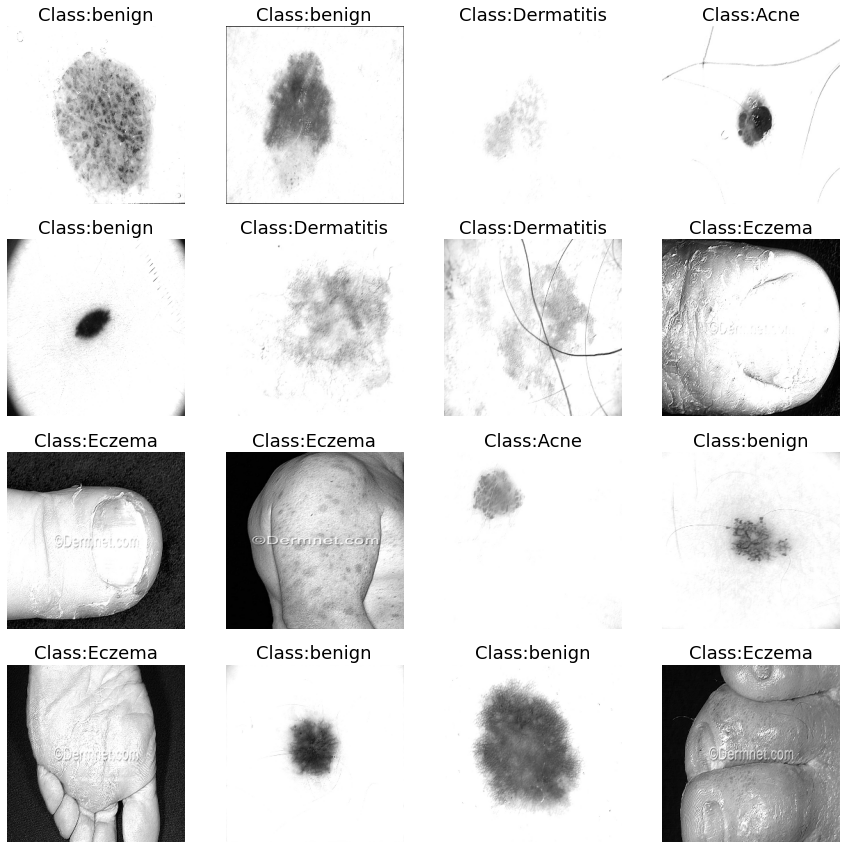

In [6]:
def show_images(X,y):
    
    # get image lables
    labels=['Acne', 'benign', 'Dermatitis', 'Eczema']
    lab=[]
    for i in range(len(y)):
        lab.append(np.argmax(y[i]))
    
    # get a lot of images
    x,y = X,lab
    
    # show a grid of 16 images
    plt.figure(figsize=(15, 15))
    plt.rcParams.update({"font.size":15})
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        idx = randint(0, 812)
        clr_img=cv.cvtColor(x[idx], cv.COLOR_BGR2RGB)
        plt.imshow(clr_img)
        plt.axis("off")
        plt.title("Class:{}".format(labels[y[idx]]))
# Display Train Images
show_images(x_train,y_train)

In [7]:
test_data = np.load('GaborDataset/test_data.npz')

In [8]:
x_test = test_data['x'] / 255 #data #normalisation
y_test = test_data['y'] #lables

In [9]:
print(x_test.shape, y_test.shape)

(167, 256, 256, 3) (167, 4)


***Random Images Visualization from test set***

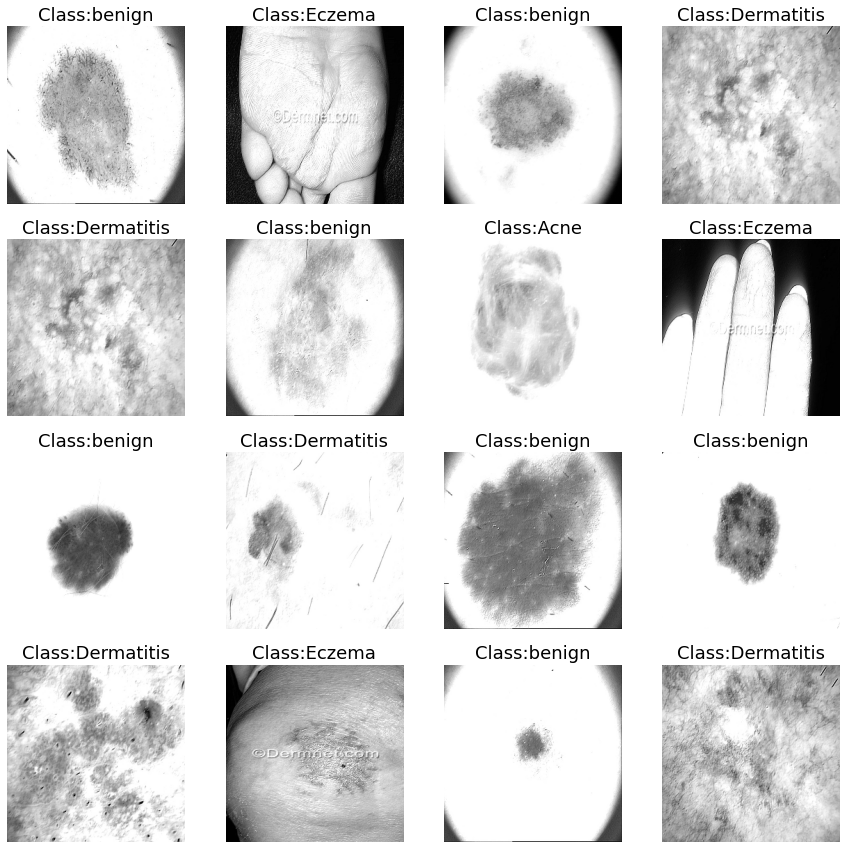

In [10]:
def show_images(X,y):
    
    # get image lables
    labels=['Acne', 'benign', 'Dermatitis', 'Eczema']
    lab=[]
    for i in range(len(y)):
        lab.append(np.argmax(y[i]))
    
    # get a lot of images
    x,y = X,lab
    
    # show a grid of 16 images
    plt.figure(figsize=(15, 15))
    plt.rcParams.update({"font.size":15})
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        idx = randint(0, 167)
        clr_img=cv.cvtColor(x[idx], cv.COLOR_BGR2RGB)
        plt.imshow(clr_img)
        plt.axis("off")
        plt.title("Class:{}".format(labels[y[idx]]))
# Display Train Images
show_images(x_test,y_test)

In [11]:
class_labels=['Acne', 'benign', 'Dermatitis', 'Eczema']
no_classes = len(class_labels)
print(no_classes)

4


## CNN(Convolutional Neural Network)

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(32, (3, 3),activation='relu', padding='same', input_shape=(256,256,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 254016)            0         
                                                                 
 dense (Dense)               (None, 128)               3

## Model Building

In [16]:
results = model.fit(x= x_train,y= y_train,batch_size= 10,epochs= 5)

Epoch 1/5
82/82 [==============================] - 58s 688ms/step - loss: 0.8320 - accuracy: 0.5567
Epoch 2/5
82/82 [==============================] - 54s 657ms/step - loss: 0.2905 - accuracy: 0.7192
Epoch 3/5
82/82 [==============================] - 55s 673ms/step - loss: 0.2204 - accuracy: 0.7894
Epoch 4/5
82/82 [==============================] - 51s 621ms/step - loss: 0.1780 - accuracy: 0.8239
Epoch 5/5
82/82 [==============================] - 55s 668ms/step - loss: 0.1522 - accuracy: 0.8498


## Accuracy and Loss Plot-Graphs

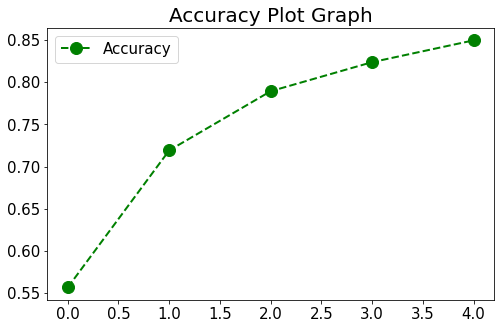

In [17]:
plt.figure(figsize=(8,5))
plt.plot(results.history["accuracy"],color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.title("Accuracy Plot Graph",fontsize=20)
plt.legend(["Accuracy"])
plt.show()

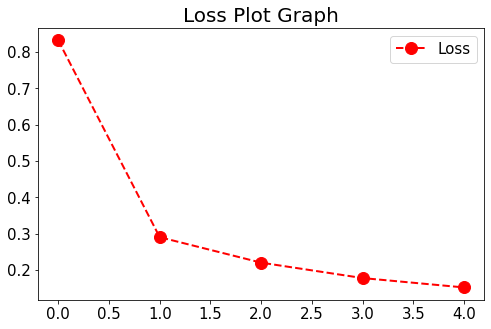

In [18]:
plt.figure(figsize=(8,5))
plt.plot(results.history["loss"],color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.title("Loss Plot Graph",fontsize=20)
plt.legend(["Loss"])
plt.show()

In [19]:
y_pred = model.predict(x_test, batch_size=10)

17/17 [==============================] - 2s 121ms/step


In [20]:
print(y_pred)

[[1.81793541e-01 3.94292504e-01 4.21468467e-01 2.44550291e-03]
 [1.33158421e-04 1.64196491e-02 9.83047068e-01 4.00165998e-04]
 [7.55635137e-03 9.09007251e-01 8.32011774e-02 2.35280750e-04]
 [4.16050628e-02 5.92602789e-01 3.63490313e-01 2.30176980e-03]
 [7.75563121e-02 1.99077412e-01 7.17920959e-01 5.44536300e-03]
 [8.83908197e-03 1.91752166e-01 7.98376262e-01 1.03245652e-03]
 [5.82075166e-03 2.00769261e-01 7.92023957e-01 1.38599868e-03]
 [1.79643894e-03 1.22271270e-01 8.75678539e-01 2.53728620e-04]
 [3.23049009e-01 1.09018914e-01 5.63639343e-01 4.29271255e-03]
 [9.86431420e-01 1.35685299e-02 4.46460255e-08 2.10573248e-09]
 [3.78651507e-02 1.35104641e-01 8.23373556e-01 3.65659082e-03]
 [3.00033753e-05 9.99543369e-01 4.22688317e-04 3.98796737e-06]
 [9.99467790e-01 3.05295369e-04 2.22315430e-04 4.55527788e-06]
 [8.02898332e-02 6.99343681e-01 2.16863528e-01 3.50295473e-03]
 [2.42225640e-02 5.32932103e-01 4.42422807e-01 4.22511337e-04]
 [1.12124076e-02 1.14441514e-01 8.72980118e-01 1.365993

In [21]:
y_predict = []
for i in range(0, len(y_pred)):
    y_predict.append(int(np.argmax(y_pred[i])))
len(y_predict)

167

In [22]:
print(y_predict)

[2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [23]:
y_true = []
for i in range(0, len(y_test)):
    y_true.append(int(np.argmax(y_test[i])))
len(y_true)

167

In [24]:
print(y_true)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


## Result Analysis

### Classification Report

In [25]:
print(classification_report(y_true=y_true,y_pred=y_predict))

              precision    recall  f1-score   support

           0       1.00      0.31      0.47        26
           1       0.78      0.97      0.86        61
           2       0.63      0.69      0.66        32
           3       1.00      1.00      1.00        48

    accuracy                           0.82       167
   macro avg       0.85      0.74      0.75       167
weighted avg       0.85      0.82      0.80       167



### Confusion Matrix

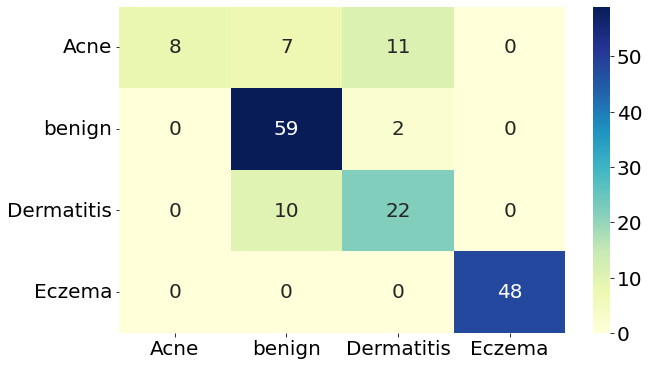

In [26]:
plt.figure(figsize=(10,6))
plt.rcParams.update({"font.size":20})
sns.heatmap(data=confusion_matrix(y_true=y_true,y_pred=y_predict),
            annot=True,
            fmt=".4g",
            xticklabels=class_labels,
            yticklabels=class_labels,
            cmap="YlGnBu")
plt.show()

## Model Saving

In [27]:
model_structure = model.to_json()
f = Path("GaborCNN_model/GaborCNN_model_structure.json")
f.write_text(model_structure)

2826

In [28]:
model.save_weights("GaborCNN_model/GaborCNN_model_weights.h5")

# Done